This notebook is based on an implementation from https://github.com/stanfordnmbl/sit2stand-analysis. 

In [11]:
import git
repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
homedir

'C:\\Users\\amanda\\Documents\\GitHub\\cs231n'

In [12]:
import sys
 
# setting path
sys.path.append(homedir)

In [13]:
%load_ext autoreload
%autoreload 2
from utils import process_subject, run_openpose
import os
import numpy as np
import pandas as pd
import pickle
import traceback
from utils import videometa

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


R
[ 74 121 157 208 260]
[ 49  91 136 183 235]
[ 32  74 121 157 208 260]
[ 49  91 136 183 235]


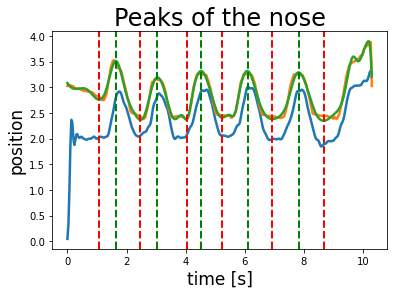

3.5866781672538943


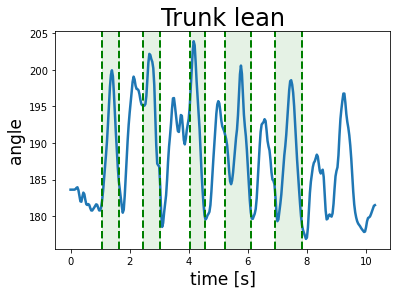

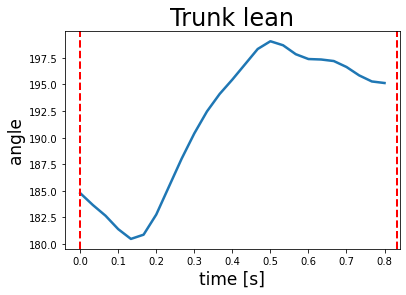

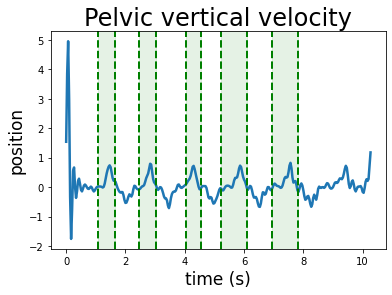

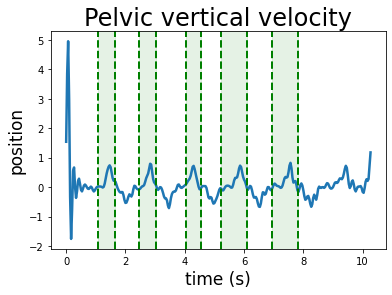

{'subjectid': '0B2dfO4b',
 'orientation': 'R',
 'framerate': 30,
 'n': 5,
 'time': 7.6000000000000005,
 'time_diff': 0.08333333333333337,
 'speed': 0.66,
 'time_sd': 0.19843834754849626,
 'speed_sd': 0.09486050458759514,
 'n_sit2stand': 5,
 'time_sit2stand': 3.4,
 'time_diff_sit2stand': -0.13333333333333333,
 'speed_sit2stand': 1.47,
 'time_sd_sit2stand': 0.16812693617224658,
 'speed_sd_sit2stand': 0.35884950502623486,
 'n_stand2sit': 4,
 'time_stand2sit': 3.3666666666666667,
 'time_diff_stand2sit': 0.21666666666666667,
 'speed_stand2sit': 1.19,
 'time_sd_stand2sit': 0.10639287779003088,
 'speed_sd_stand2sit': 0.15169114701139502,
 'left_knee_range_mean': 66.88817474047468,
 'left_knee_sd': 23.26692482087047,
 'left_knee_max': 178.96091589815802,
 'left_knee_min': 108.86438641404452,
 'left_knee_max_mean': 177.92919585745182,
 'left_knee_min_mean': 114.23343115469493,
 'left_knee_max_sd': 0.9887843320374662,
 'left_knee_min_sd': 4.451500273856787,
 'left_knee_ang_vel': -4.1051220585293

In [14]:
# Process a subject (quick test)
process_subject("0B2dfO4b", processed_npy_path="{}/videos/np/".format(homedir) , framerate=30)

In [6]:
# Get a list of all subjects
subjects = os.listdir("{}/videos/keypoints/".format(homedir))

0B2dfO4b
R
[ 74 121 157 208 260]
[ 49  91 136 183 235]
[ 32  74 121 157 208 260]
[ 49  91 136 183 235]


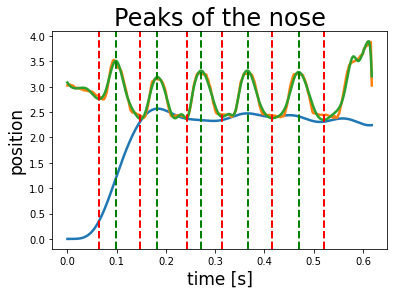

3.5866781672538943


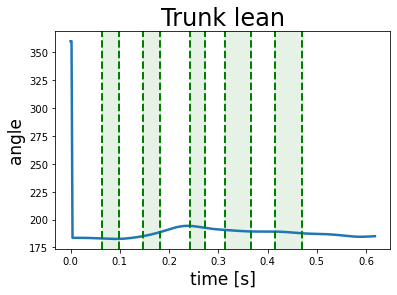

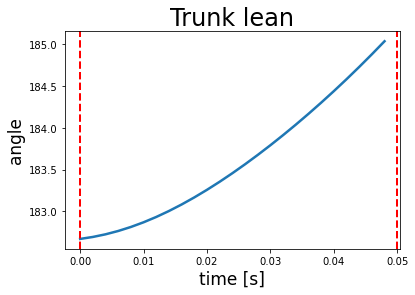

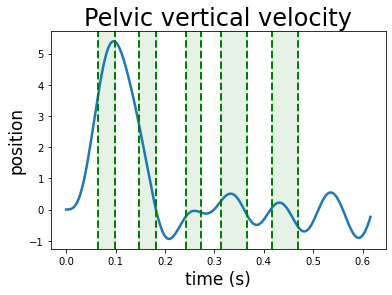

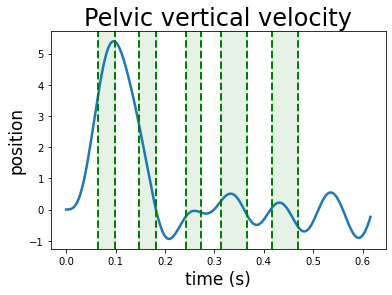

[]


In [7]:
skipped = []
all_res = []

# Convert OpenPose frames to a numpy array
for subjectid in subjects: #).difference(set(toremove + tocheck)):
    print(subjectid)
    try:
        results = process_subject(subjectid, processed_npy_path="{}/videos/np/".format(homedir) , framerate=30)
    except Exception as e:
        traceback.print_exc()
        skipped.append(subjectid)
        print("Skipped " + subjectid)
        continue
    all_res.append(results)    
print(skipped)

In [8]:
# Write ids of all videos that were skipped
for s in skipped:
    print(s)

In [9]:
# Print out and save results
res_df = pd.DataFrame(all_res)
res_df

,subjectid,orientation,framerate,n,time,time_diff,speed,time_sd,speed_sd,n_sit2stand,...,neck_max_y_acc_stand2sit,ank_to_hip_dist_sit,ank_to_hip_dist_stand,knee_to_hip_dist_sit,knee_to_hip_dist_stand,height,lknee_angle_first_sit,rknee_angle_first_sit,lknee_angle_first_stand,rknee_angle_first_stand
0,0B2dfO4b,R,500,5,0.456,0.005,10.96,0.011906,1.581008,5,...,140.464987,1.232412,1.217529,0.945666,0.929226,0.763421,122.970041,116.328133,122.712669,115.873308


In [10]:
res_df.to_csv("{}/results/results-20230427.csv".format(homedir))